# Práctica 1: análisis del fichero mundo

Autores:
- David Ruiz Alamillo
- Manuel Pertejo Lope

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 50

In [3]:
data = pd.read_csv('./data/mundo-utf8.csv')
data.head()

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2
0,Acerbaján,7400,86.0,54.0,Musulma.,75,67,98.0,1.40,35.0,3000,5,NaN,NaN,23.0,7.0,NaN,3.477121,NaN,3.285714,2.80,3.869232,100.0,100.0,3.0,5.0
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,205,3,NaN,0.0,53.0,22.0,0.000000,2.311754,0.000000,2.409091,6.90,4.311754,44.0,14.0,3.0,3.0
2,Alemania,81200,227.0,85.0,Protest.,79,73,99.0,0.36,6.5,17539,1,3443.0,11179.0,11.0,11.0,13.767241,4.244005,1.689544,1.000000,1.47,4.909556,NaN,NaN,8.0,1.0
3,Arabia Saudí,18000,7.7,77.0,Musulma.,70,66,62.0,3.20,52.0,6651,5,2874.0,61.0,38.0,6.0,0.338889,3.822887,0.805400,6.333333,6.67,4.255273,73.0,48.0,1.0,5.0
4,Argentina,33900,12.0,86.0,Católica,75,68,95.0,1.30,25.6,3408,6,3113.0,3904.0,20.0,9.0,11.516224,3.532500,1.630279,2.222222,2.80,4.530200,96.0,95.0,8.0,6.0


In [7]:
# El dataset contiene 109 observaciones de 26 variables diferentes
np.shape(data)

(109, 26)

# Ejercicio 1


A continuación se muestra en forma de tabla:
* El número de valores distintos de missing para cada columna.
* La media y la desviación estándar de cada columna.
* Los valores mínimos y máximos para cada columna.

In [79]:
stats = pd.Series(data.shape[0] - data.isna().sum(axis=0), name = 'no_missings').to_frame()
stats['var_name'] = stats.index
stats = stats[['var_name','no_missings']]
stats.reset_index(drop = True, inplace = True)
mean_values = pd.Series(data.mean(axis = 0), name = 'mean').to_frame()
mean_values['var_name'] = mean_values.index
mean_values.reset_index(drop = True, inplace = True)
std_values = pd.Series(data.std(axis = 0), name = 'std').to_frame()
std_values['var_name'] = std_values.index
std_values.reset_index(drop = True, inplace = True)
min_values = pd.Series(data.min(axis = 0), name = 'min').to_frame()
min_values['var_name'] = min_values.index
min_values.reset_index(drop = True, inplace = True)
max_values = pd.Series(data.max(axis = 0), name = 'max').to_frame()
max_values['var_name'] = max_values.index
max_values.reset_index(drop = True, inplace = True)
stats = stats.merge(mean_values, on = 'var_name', how = 'left')
stats = stats.merge(std_values, on = 'var_name', how = 'left')
stats = stats.merge(min_values, on = 'var_name', how = 'left')
stats = stats.merge(max_values, on = 'var_name', how = 'left')
stats

,var_name,no_missings,mean,std,min,max
0,pa_s,109,NaN,NaN,Acerbaján,Zambia
1,poblac,109,47723.880734,146726.363732,256,1205200
2,densidad,109,203.414679,675.705193,2.3,5494
3,urbana,108,56.527778,24.203367,5,100
4,relig,108,NaN,NaN,NaN,NaN
5,espvidaf,109,70.155963,10.571778,43,82
6,espvidam,109,64.917431,9.272748,41,76
7,alfabet,107,78.336449,22.883191,18,100
8,inc_pob,109,1.682385,1.197561,-0.3,5.24
9,mortinf,109,42.312936,38.079225,4,168


# Ejercicio 2

Hay datos que nos interesa analizar basándonos en agrupaciones, para darle un sentido a nuestro análisis en base a esa agrupación. Basándonos en las siguientes agrupaciones:

## Por región

In [4]:
data.regi_n.unique()

array([5, 3, 1, 6, 2, 4])

In [5]:
Regiones = data.groupby('regi_n')['pib_cap', 'espvidam', 'alfabet', 'mortinf', 'log_pob'].describe()

In [6]:
Regiones

pib_cap                                                                \
         count          mean          std     min      25%      50%      75%   
regi_n                                                                         
1         21.0  16610.857143  3725.970535  8060.0  15877.0  17245.0  18277.0   
2         14.0   5159.785714  1708.700819  2340.0   3980.5   5368.0   6635.0   
3         17.0   4263.000000  6291.046495   202.0    275.0    867.0   6627.0   
4         19.0    998.684211  1178.257709   122.0    307.5    409.0   1027.5   
5         17.0   4957.411765  4057.448137   748.0   1500.0   3721.0   6818.0   
6         21.0   1997.666667  1482.123117   383.0   1078.0   1500.0   2591.0   

                espvidam                                                      \
            max    count       mean       std   min    25%   50%   75%   max   
regi_n                                                                         
1       23474.0     21.0  73.714286  1.146423  71.0  73.00  74.0  74.0  76.0   
2        7400.0     14.0  67.714286  2.334641  64.0  66.25  68.5  69.0  72.0   
3       19860.0     17.0  63.470588  8.725807  45.0  58.00  65.0  68.0  76.0   
4        4283.0     19.0  50.789474  7.261611  41.0  45.00  51.0  54.5  66.0   
5       14193.0     17.0  67.352941  3.920159  60.0  65.00  67.0  70.0  76.0   
6        6950.0     21.0  66.238095  7.334199  43.0  63.00  68.0  71.0  76.0   

       alfabet                                                       mortinf  \
         count       mean        std   min   25%   50%    75%    max   count   
regi_n                                                                         
1         21.0  97.666667   3.366502  85.0  97.0  99.0  99.00  100.0    21.0   
2         13.0  97.000000   3.763863  86.0  97.0  99.0  99.00   99.0    14.0   
3         17.0  72.941176  25.168111  29.0  52.0  78.0  91.00   99.0    17.0   
4         19.0  47.263158  17.863190  18.0  32.5  50.0  57.50   76.0    19.0   
5         16.0  74.750000  15.872408  48.0  63.5  75.0  83.75   98.0    17.0   
6         21.0  82.666667  13.484559  53.0  78.0  87.0  93.00   99.0    21.0   

                                                               log_pob  \
             mean        std   min    25%    50%    75%    max   count   
regi_n                                                                   
1        6.910000   1.172220   4.0   6.30    6.8    7.4    9.2    21.0   
2       16.892857   5.483046   8.7  12.55   18.0   20.6   27.0    14.0   
3       53.882353  46.441364   4.4  21.70   46.0   79.0  168.0    17.0   
4       94.178947  28.653186  39.3  75.50  105.0  115.0  137.0    19.0   
5       41.394118  19.178877   8.6  27.00   39.5   53.0   76.4    17.0   
6       39.114286  24.524443  10.2  20.30   35.0   52.5  109.0    21.0   

                                                                              
            mean       std       min       25%       50%       75%       max  
regi_n                                                                        
1       4.115741  0.640604  2.419956  3.716003  4.017033  4.593286  5.416308  
2       4.010924  0.539278  3.204120  3.669617  3.981114  4.282209  5.173769  
3       4.723024  0.700803  3.462398  4.311754  4.773786  5.098644  6.081059  
4       3.989771  0.570941  2.981819  3.648333  3.959041  4.453308  4.991669  
5       3.899783  0.592374  2.778151  3.558709  3.740363  4.298853  4.816904  
6       3.973837  0.589401  2.408240  3.716003  3.897627  4.313867  5.194792

## Análisis de los datos

Encontramos 6 tipos de regiones enumeradas del 1 al 6:

- La regíon tipo 1 la forman 21 paises.
- La regíon tipo 2 la forman 14 paises.
- La regíon tipo 3 la forman 17 paises.
- La regíon tipo 4 la forman 19 paises.
- La regíon tipo 5 la forman 17 paises.
- La regíon tipo 6 la forman 21 paises.

#### Pib_cap

Con respecto al Pib per cápita, las región número 1 es la que mayor produción obtiene anualmente, más del triple que la segunda región con mayor producción (Región número 2). Lo que indica una gran desigualdad entre los seis tipos de regiones.

#### Esperanza de vida
La región con mayor esperanza de vida es la región número 1, con 73 años de media, seguida de la región número 2 y 5. La región con menor esperanza de vida es la región número 4, con una diferencia del 46% con respecto a la región Nº1.

#### Alfabetización
La distribución de la alfabetización con respecto a las regiones estudiadas es la misma que la esperanza de vida. La región número 1 es la que mayor tasa de alfabetización obtiene en nuestra muestra y la región número 4 es la región con menor tasa de alfabetización.

#### Mortalidad infaltil
La mortalidad infantil en la región número 4 es la mayor de toda nuestra muestra, un 1250% más que la región con menor tasa de moratidad infantil que es la región número 1.

#### Incremento de la población
Posiblemente es la variable con menores diferencias entre las regiones. La región número 3 es la región con mayor crecimiento en su población, seguido de la región número 1.

### Conclusiones finales:

En primer lugar, encontramos grandes diferencias entre las regiones, sobretodo en la variable Pib_cap y en la variable de mortalidad infantil, que representan una distribución inversamente proporcional. Además indica las grandes diferencias entre las regiones con más recursos y las regiones más pobres.

La gran mayoría de las variables estudiadas son medidas incluidas en los índices de desarrollo humano a excepción de la tasa de mortalidad infantil. Los paises con más recursos son los que mejores cifras obtienen en las variables socioeconómicas y sociodemográficas, y las que menor tasa de mortalidad infantil presentan.

## Por religión

In [7]:
data.relig.unique()

array(['Musulma.', 'Protest.', 'Católica', 'Ortodoxa', 'Tribal',
       'Animista', 'Budista', 'Taoista', 'Indú', 'Judía', nan],
      dtype=object)

In [9]:
Religion = data.groupby('relig')['pib_cap', 'espvidam', 'alfabet', 'mortinf', 'log_pob'].describe()

In [10]:
Religion

pib_cap                                                          \
           count          mean           std      min       25%      50%   
relig                                                                      
Animista     4.0    505.500000    330.568702    263.0    333.50    383.0   
Budista      7.0   6406.571429   7912.046761    230.0    630.00   1800.0   
Católica    41.0   5780.170732   6751.125584    208.0   1078.00   2591.0   
Indú         1.0    275.000000           NaN    275.0    275.00    275.0   
Judía        1.0  13066.000000           NaN  13066.0  13066.00  13066.0   
Musulma.    27.0   2906.814815   3299.394525    122.0    712.50   1500.0   
Ortodoxa     8.0   4951.625000   2013.889055   2340.0   3548.75   4750.0   
Protest.    16.0  12642.062500   6904.496124    457.0   6869.25  15925.5   
Taoista      2.0   7683.500000  10332.951393    377.0   4030.25   7683.5   
Tribal       1.0   2677.000000           NaN   2677.0   2677.00   2677.0   

                            espvidam                                           \
               75%      max    count       mean        std   min    25%   50%   
relig                                                                           
Animista    555.00    993.0      4.0  49.250000   6.551081  41.0  45.50  50.5   
Budista   10848.00  19860.0      7.0  66.857143   8.933618  50.0  64.00  67.0   
Católica   7311.00  22384.0     41.0  65.682927   9.535300  41.0  63.00  69.0   
Indú        275.00    275.0      1.0  58.000000        NaN  58.0  58.00  58.0   
Judía     13066.00  13066.0      1.0  76.000000        NaN  76.0  76.00  76.0   
Musulma.   3409.50  14193.0     27.0  62.333333   7.646015  45.0  56.00  65.0   
Ortodoxa   6545.00   8060.0      8.0  68.125000   3.399054  64.0  65.75  68.5   
Protest.  17315.50  23474.0     16.0  68.375000  10.588516  41.0  67.75  73.0   
Taoista   11336.75  14990.0      2.0  70.000000   4.242641  67.0  68.50  70.0   
Tribal     2677.00   2677.0      1.0  60.000000        NaN  60.0  60.00  60.0   

                      alfabet                                                  \
            75%   max   count       mean        std   min    25%   50%    75%   
relig                                                                           
Animista  54.25  55.0     4.0  39.500000  15.438048  18.0  34.50  43.0  48.00   
Budista   73.50  76.0     7.0  83.142857  22.512430  35.0  82.50  91.0  96.00   
Católica  73.00  76.0    40.0  84.150000  16.385657  48.0  76.75  89.0  97.00   
Indú      58.00  58.0     1.0  52.000000        NaN  52.0  52.00  52.0  52.00   
Judía     76.00  76.0     1.0  92.000000        NaN  92.0  92.00  92.0  92.00   
Musulma.  67.00  73.0    26.0  60.000000  22.483772  24.0  40.50  63.0  77.75   
Ortodoxa  69.00  75.0     8.0  96.750000   2.549510  93.0  95.25  97.5  99.00   
Protest.  74.00  76.0    16.0  92.750000  18.710069  27.0  98.50  99.0  99.00   
Taoista   71.50  73.0     2.0  83.000000   7.071068  78.0  80.50  83.0  85.50   
Tribal    60.00  60.0     1.0  72.000000        NaN  72.0  72.00  72.0  72.00   

                mortinf                                                 \
            max   count        mean        std   min      25%      50%   
relig                                                                    
Animista   54.0     4.0  104.500000  18.627936  77.0  101.750  111.500   
Budista    99.0     7.0   34.000000  38.260728   4.4    5.450   27.700   
Católica   99.0    41.0   36.253659  33.666579   6.2    9.200   25.200   
Indú       52.0     1.0   79.000000        NaN  79.0   79.000   79.000   
Judía      92.0     1.0    8.600000        NaN   8.6    8.600    8.600   
Musulma.   98.0    27.0   63.348148  38.338235  12.5   35.850   53.000   
Ortodoxa   99.0     8.0   19.650000   6.663761   8.2   17.250   20.500   
Protest.  100.0    16.0   23.150625  36.126813   4.0    6.450    7.705   
Taoista    88.0     2.0   28.850000  32.739044   5.7   17.275   28.850   
Tribal     72.0     1.0 

## Análisis de los datos

Encontramos 5 religiones:

- La religión Animista está presente en 4 paises.
- La religión Budista está presente en 7 paises.
- La religión Católica está presente en 41 paises, la más mayoritaria.
- La religión Indú está presente en 1 paises.
- La religión Judía está presente en 1 paises.
- La religión Musulmana está presente en 27 paises.
- La religión Ortodoxa está presente en 8 paises.
- La religión Protestante está presente en 16 paises.
- La religión Taoista está presente en 2 paises.
- La religión Tribal está presente en 1 paises.

#### Pib_cap
Las religiónes con mayor produción anual son el Judaismo y el protestanismo, con casi el doble de PIB que el Cristianismo, la siguiente religión. La religión con menor capacidad económica es la indú.
#### Esperanza de vida
Las religiónes con mayores esperanzas de vida son el Judaismo y el protestanismo seguidas de la religión budísta y católica. La religión con menor esperanza de vida es la religión Animista.
#### Alfabetización
Las religiónes con mayor tasa de alfabetización son el Judaismo y el protestanismo seguido por el cristianismo y el Budismo. La religión con menor tasa es la religión Animista.
#### Mortalidad infaltil
La religión con mayor tasa de mortalidad infantil es la regilión Animista con una diferencia notable, esto se puede deber a cuestiones culturales o a las zonas donde se establece dicha religión.
#### Incremento de la población
En esta variable no encontramos grandes diferencias entre los paises.

### Conclusiones finales:

Al igual que en el apartado anterior y a diferencia de lo que se podría llegar a pensar, las diferencias en las variables entre las distintas religiones la rigen los recursos económicos y no los culturales, a excepción de la tasa de mortalidad que sí podrían estar influenciadas por la cultura de dicha religión.

# Ejercicio 3 

Se calcula inicialmente la tasa de mortalidad media del conjunto:

In [80]:
mortalidad_media = data.tasa_mor.mean()
mortalidad_media

9.557314814814815

A continuación se muestran los países cuya tasa de mortalidad es superior a la media:

In [81]:
paises_mayor_mortalidad = data.loc[data.tasa_mor > mortalidad_media]
paises_mayor_mortalidad.head()

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,205,3,NaN,0.0,53.0,22.0,0.000000,2.311754,0.000000,2.409091,6.90,4.311754,44.0,14.0,3.0,3.0
2,Alemania,81200,227.0,85.0,Protest.,79,73,99.0,0.36,6.5,17539,1,3443.0,11179.0,11.0,11.0,13.767241,4.244005,1.689544,1.000000,1.47,4.909556,NaN,NaN,8.0,1.0
7,Austria,8000,94.0,58.0,Católica,79,73,99.0,0.20,6.7,18396,1,3495.0,1150.0,12.0,11.0,14.375000,4.264723,1.704204,1.090909,1.50,3.903090,NaN,NaN,8.0,1.0
9,Bangladesh,125000,800.0,16.0,Musulma.,53,53,35.0,2.40,106.0,202,3,2021.0,1.0,35.0,11.0,0.000858,2.305351,0.243590,3.181818,4.70,5.096910,47.0,22.0,5.0,3.0
11,Bélgica,10100,329.0,96.0,Católica,79,73,99.0,0.20,7.2,17912,1,NaN,1603.0,12.0,11.0,15.871287,4.253144,1.738291,1.090909,1.70,4.004321,NaN,NaN,8.0,1.0


Nos llama la atención que entre los países con una tasa de mortalidad superior a la media aparecen 3 países Europeos como son Alemania, Austria y Bélgica. Sin embargo, si nos fijamos en la tasa de mortalidad infantil vemos que es ínfima (al contrario que en los otros dos países con tasa de mortalidad superior a la media). A su vez, nos fijamos también en que para estos 3 países la tasa de natalidad es muy baja. Con lo cual, determinamos que la tasa de mortalidad alta se debe a que la población está bastante envejecida en estos países.

# Ejercicio 4

In [4]:
TasasMedias = data.groupby('clima')['tasa_nat','tasa_mor'].mean()

In [5]:
TasasMedias

,tasa_nat,tasa_mor
clima,,
1.0,38.428571,7.000000
2.0,34.600000,6.000000
3.0,29.000000,8.833333
4.0,36.800000,9.200000
5.0,31.843750,10.387500
6.0,25.800000,9.150000
7.0,13.750000,11.000000
8.0,17.676471,10.008529
9.0,13.500000,10.000000


Vemos una relación directa entre el tipo de clima y las tasas de natalidad y moralidad. 
El clima 1 es el que mayor tasa de natalidad y a la vez la menor tasa de mortalidad. El clima 9 es el que menor tasa de natalidad representa y mayor tasa de mortalidad.

#### Paises con mayor tasa de mortalidad y de natalidad

In [6]:
PaisNat = data[['pa_s', 'tasa_nat','tasa_mor']]

In [7]:
OrderByPaisMort = PaisNat.sort_values(by =['tasa_mor', 'pa_s'], ascending = False)

In [8]:
OrderByPaisMort.head()

,pa_s,tasa_nat,tasa_mor
103,Uganda,49.0,24.0
1,Afganistán,53.0,22.0
88,Ruanda,49.0,21.0
85,Rep. C. Africana,44.0,21.0
19,Burundi,44.0,21.0


Se puede ver que Uganda es el país con mayor tasa de mortalidad.

In [9]:
OrderByPaisNat = PaisNat.sort_values(by =['tasa_nat', 'pa_s'], ascending = False)

In [10]:
OrderByPaisNat.head()

,pa_s,tasa_nat,tasa_mor
1,Afganistán,53.0,22.0
103,Uganda,49.0,24.0
88,Ruanda,49.0,21.0
18,Burkina Faso,47.0,18.0
108,Zambia,46.0,18.0


En este caso, Afganistán es el país con mayor tasa de natalidad.

#### Regiones y tasas de mortalidad

In [11]:
RegiMort = data.groupby('regi_n')['tasa_mor'].agg(['mean'])

In [12]:
RegiMort

,mean
regi_n,
1,9.633333
2,10.820714
3,8.843750
4,14.736842
5,6.058824
6,7.328571


In [13]:
OrderByRegMor = RegiMort.sort_values(by =['mean'], ascending = False)

In [14]:
OrderByRegMor

,mean
regi_n,
4,14.736842
2,10.820714
1,9.633333
3,8.843750
6,7.328571
5,6.058824


La región con la mayor tasa de mortalidad es la región número 4, seguida de la región número 2.

# Ejercicio 5

Inicialmente se calcula el PIB de cada país y se guarda en una columna de nuestro dataframe:

In [6]:
data['pib'] = data['poblac'] * data['pib_cap']
data.head()

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2,pib
0,Acerbaján,7400,86.0,54.0,Musulma.,75,67,98.0,1.40,35.0,3000,5,NaN,NaN,23.0,7.0,NaN,3.477121,NaN,3.285714,2.80,3.869232,100.0,100.0,3.0,5.0,22200000
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,205,3,NaN,0.0,53.0,22.0,0.000000,2.311754,0.000000,2.409091,6.90,4.311754,44.0,14.0,3.0,3.0,4202500
2,Alemania,81200,227.0,85.0,Protest.,79,73,99.0,0.36,6.5,17539,1,3443.0,11179.0,11.0,11.0,13.767241,4.244005,1.689544,1.000000,1.47,4.909556,NaN,NaN,8.0,1.0,1424166800
3,Arabia Saudí,18000,7.7,77.0,Musulma.,70,66,62.0,3.20,52.0,6651,5,2874.0,61.0,38.0,6.0,0.338889,3.822887,0.805400,6.333333,6.67,4.255273,73.0,48.0,1.0,5.0,119718000
4,Argentina,33900,12.0,86.0,Católica,75,68,95.0,1.30,25.6,3408,6,3113.0,3904.0,20.0,9.0,11.516224,3.532500,1.630279,2.222222,2.80,4.530200,96.0,95.0,8.0,6.0,115531200


Se ordenan los países de menor a mayor según su PIB:

In [7]:
pib_ordered_data = data.sort_values('pib')
pib_ordered_data.head()

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2,pib
44,Gambia,959,86.0,23.0,Musulma.,52,48,27.0,3.10,124.0,351,4,NaN,277.0,46.0,16.0,25.181818,2.545307,1.906415,2.875000,6.29,2.981819,39.0,16.0,5.0,4.0,336609
67,Liberia,2900,29.0,45.0,Animista,57,54,40.0,3.30,113.0,409,4,2382.0,191.0,43.0,12.0,6.586207,2.611723,1.457898,3.583333,6.80,3.462398,50.0,29.0,5.0,4.0,1186100
19,Burundi,6000,216.0,5.0,Católica,50,46,50.0,2.26,105.0,208,4,1932.0,7225.0,44.0,21.0,120.416667,2.318063,2.606978,2.095238,6.80,3.778151,61.0,40.0,8.0,4.0,1248000
85,Rep. C. Africana,3300,5.0,47.0,Protest.,44,41,27.0,2.40,137.0,457,4,2036.0,3730.0,44.0,21.0,113.030303,2.659916,2.574180,2.100000,5.42,3.518514,33.0,15.0,5.0,4.0,1508100
10,Barbados,256,605.0,45.0,Protest.,78,73,99.0,0.21,20.3,6950,6,NaN,418.0,16.0,8.4,139.333333,3.841985,2.684176,1.904762,1.78,2.408240,99.0,99.0,5.0,6.0,1779200


Posteriormente se realiza lo mismo pero con el PIB per cápita:

In [9]:
pib_cap_ordered_data = data.sort_values('pib_cap')
pib_cap_ordered_data.head()

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2,pib
39,Etiopía,55200,47.0,12.0,Musulma.,54,51,24.0,3.10,110.0,122,4,1667.0,12958.0,45.0,14.0,23.474638,2.086360,1.879835,3.214286,6.81,4.741939,32.0,16.0,5.0,4.0,6734400
9,Bangladesh,125000,800.0,16.0,Musulma.,53,53,35.0,2.40,106.0,202,3,2021.0,1.0,35.0,11.0,0.000858,2.305351,0.243590,3.181818,4.70,5.096910,47.0,22.0,5.0,3.0,25250000
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,205,3,NaN,0.0,53.0,22.0,0.000000,2.311754,0.000000,2.409091,6.90,4.311754,44.0,14.0,3.0,3.0,4202500
19,Burundi,6000,216.0,5.0,Católica,50,46,50.0,2.26,105.0,208,4,1932.0,7225.0,44.0,21.0,120.416667,2.318063,2.606978,2.095238,6.80,3.778151,61.0,40.0,8.0,4.0,1248000
107,Vietnam,73100,218.0,20.0,Budista,68,63,88.0,1.78,46.0,230,3,2233.0,107.0,27.0,8.0,0.146375,2.361728,0.680916,3.375000,3.33,4.863917,93.0,83.0,5.0,3.0,16813000


# Ejercicio 6

En la siguiente gráfico de barras se muestran los 20 países con el PIB más alto:

[Text(0, 0.5, ''), Text(0.5, 0, 'PIB')]

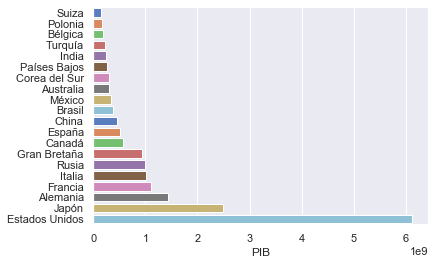

In [58]:
n_largest = pib_ordered_data.tail(20)
sns.set(style = 'darkgrid')
ax = sns.barplot(x = 'pib', y = 'pa_s', orient= 'h', palette='muted', data = n_largest)
ax.set(xlabel='PIB', ylabel='')

El siguiente gráfico de barras muestra los 20 países con el mayor PIB per cápita:

[Text(0, 0.5, ''), Text(0.5, 0, 'PIB per cápita')]

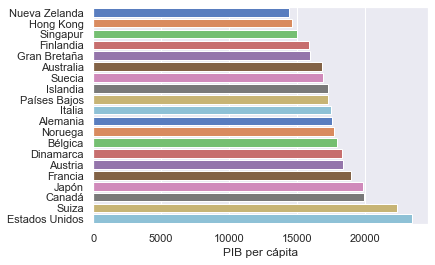

In [59]:
n_largest = pib_cap_ordered_data.tail(20)
sns.set(style = 'darkgrid')
ax = sns.barplot(x = 'pib_cap', y = 'pa_s', orient= 'h', palette='muted', data = n_largest)
ax.set(xlabel='PIB per cápita', ylabel='')

# Ejercicio 7

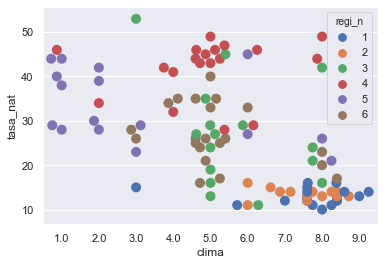

In [20]:
sns.set(style='darkgrid')
swarm = sns.swarmplot(x="clima", y="tasa_nat", hue="regi_n", data=data, size = 10)

Se pueden apreciar tres grupos claramente diferenciados, las regiones con una tasa de natalidad inferior al 30%, con una tasa al rededor del 30% y las que tienen una tasa superior al 30%.

- Tasa inferior: Región número 1, número 2 y número 3.
- Tasa intermedia: Región número 6.
- Tasa superior: Región número 4 y número 5.

Observamos dos regiones claramente separadas tanto por la variable clima, cómo por la variable natalidad, estas son las regiones número 1 y la región número 4. Gracias al estudio anterior, entre estas regiones la gran diferencia la establece su capacidad económica. Por lo que podemos observar una 

# Ejercicio 8

In [17]:
NatRegion = data[['tasa_nat','clima']]

In [18]:
NatRegion.head()

,tasa_nat,clima
0,23.0,3.0
1,53.0,3.0
2,11.0,8.0
3,38.0,1.0
4,20.0,8.0


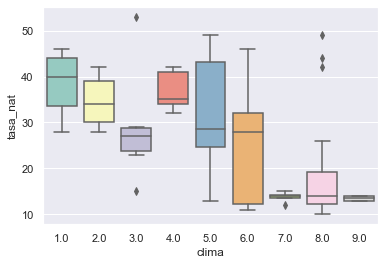

In [19]:
sns.set(style='darkgrid')
ax = sns.boxplot(x="clima", y="tasa_nat", data=NatRegion, palette="Set3")

Con respecto a la simetría de la gráfica, se puede ver que el clima 2 y el clima 9 son los climas con una distribución más simétrica por las pequeñas diferencia entre sus medias y medianas. 

Cómo distribución sesgada positiva,encontramos los clima 4, 5 y 8, la mayor parte de los datos se encuentran por encima de la mediana, por lo que la media será mayor que la mediana.

Los climas con distribuciones negativas son los climas 1, 3, 6 y 7, puesto que la mayor parte de sus datos se encuentran en la parte inferior, lo que significa que la media es menor que la mediana.

Respecto a los valores atípicos, los más importantes los encontramos tanto en el clima 3, cómo en el clima 8. Estos valores son de mucha importancia puesto que pueden indicar eventos únicos o especiales que tendremos que tener en cuenta.

# Ejercicio 9

Una de las variables que nos ha llamado la atención es la tasa de sida, denotada por "sida" en el conjunto de datos, y ver como variaba en función de las diferentes religiones presentes. El objetivo de este análisis es comprobar si este factor cultural tiene y la tasa se encuentran relacionados de alguna manera.

In [21]:
ReligionSida = data.groupby('relig')['tasasida'].describe()

In [22]:
ReligionSida

,count,mean,std,min,25%,50%,75%,max
relig,,,,,,,,
Animista,4.0,50.474030,54.901717,6.586207,19.234338,32.690191,63.929883,129.929530
Budista,6.0,1.989986,3.744319,0.000000,0.036594,0.357251,1.422204,9.518519
Católica,41.0,31.578316,45.141171,0.131579,3.371681,15.871287,36.307692,221.590909
Indú,1.0,0.078214,NaN,0.078214,0.078214,0.078214,0.078214,0.078214
Judía,1.0,5.166667,NaN,5.166667,5.166667,5.166667,5.166667,5.166667
Musulma.,25.0,2.864930,6.832274,0.000000,0.132653,0.338889,0.962280,25.181818
Ortodoxa,8.0,2.637506,4.761923,0.036364,0.053472,0.094120,2.404170,11.692308
Protest.,16.0,54.140419,89.196718,0.042697,7.315207,12.998831,48.608537,326.747253
Taoista,2.0,1.294680,1.826495,0.003153,0.648916,1.294680,1.940443,2.586207


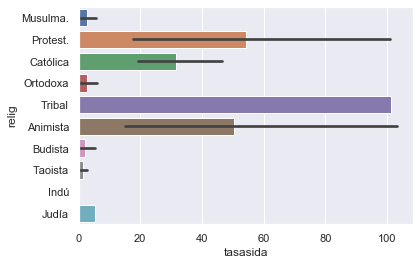

In [25]:
sns.barplot(x="tasasida", y="relig", data=data)

Gracias a este simple análisis se ha podido comprobar que a diferencia de otras variables estudiadas, la tasa de sida no sigue un comportamiento basado en la capacidad económica de los paises, sino que entra en juego la cultura subyacente a dichas religiones.

Las 4 religiones con mayores tasas son: 

    1. Religión Tribal.
    2. Religión Animista.
    3. Religión Protestante.
    4. Religión Católica.

Otra característica de la cual nos ha parecido interesante realizar un estudio más exhaustivo es el ratio entre la tasa de natalidad y de mortalidad, denotada por "nac_def" en el conjunto de datos. Lo primero que se ha hecho es eliminar las observaciones que contienen valores nulos en esta variable. Realmente solo aparece uno, correspondiente a Taiwan. No es posible calcular el valor "nac_def" para este país, ya que no disponemos del dato de la tasa de mortalidad.

In [11]:
data = data.dropna(subset=['nac_def'])

A continuación se muestra el ratio medio mundial:

In [23]:
print('El ratio medio de nacimientos/defunciones mundial es %.2f.'%data.nac_def.mean())

El ratio medio de nacimientos/defunciones mundial es 3.20.


In [15]:
data.sort_values('nac_def').head()

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2
52,Hungía,10500,111.0,64.0,Católica,76,67,99.0,-0.30,12.5,5249,2,3644.0,149.0,12.0,13.0,1.419048,3.720077,1.072505,0.923077,1.80,4.021189,99.0,98.0,8.0,2.0
102,Ucrania,51800,87.0,67.0,Ortodoxa,75,65,97.0,0.05,20.7,2340,2,NaN,27.0,12.0,13.0,0.051724,3.369216,0.553017,0.923077,1.82,4.714330,100.0,100.0,8.0,2.0
2,Alemania,81200,227.0,85.0,Protest.,79,73,99.0,0.36,6.5,17539,1,3443.0,11179.0,11.0,11.0,13.767241,4.244005,1.689544,1.000000,1.47,4.909556,NaN,NaN,8.0,1.0
29,Croacia,4900,85.0,51.0,Católica,77,70,97.0,-0.10,8.7,5487,2,NaN,56.0,11.0,11.0,1.142857,3.739335,1.027066,1.000000,1.65,3.690196,NaN,NaN,6.0,2.0
47,Grecia,10400,80.0,63.0,Ortodoxa,80,75,93.0,0.84,8.2,8060,1,3825.0,916.0,10.0,10.0,8.807692,3.906335,1.545156,1.000000,1.50,4.017033,98.0,89.0,8.0,1.0


Al ser el valor medio mayor que 1, podemos determinar que la población mundial está creciendo en la actualidad. También se muestran los valores máximo y mínimo:

In [16]:
print('Los valores máximos y mínimos son {} y {}, que se corresponden con {} para el máximo y {} y {} que están igualadas en el mínimo.'.format(data.nac_def.max(),data.nac_def.min(),data.loc[data.nac_def == data.nac_def.max()]['pa_s'].values[0],data.loc[data.nac_def == data.nac_def.min()]['pa_s'].values[0],data.loc[data.nac_def == data.nac_def.min()]['pa_s'].values[1]))

Los valores máximos y mínimos son 14.0 y 0.9230769231, que se corresponden con Kuwait para el máximo y Hungía y Ucrania que están igualadas en el mínimo.


En el caso de Kuwait, vemos que la tasa de natalidad es excepcionalmente alta (28), unido a una tasa de mortalidad muy baja (2).

In [53]:
data.loc[data['pa_s'] == 'Kuwait']

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2
64,Kuwait,1800,97.0,96.0,Musulma.,78,73,73.0,5.24,12.5,6818,5,3195.0,10.0,28.0,2.0,0.555556,3.833657,0.88909,14.0,4.0,3.255273,77.0,67.0,2.0,5.0


Para el caso del valor mínimo tenemos dos países empatados, Hungría y Ucrania. Sin embargo en este caso las tasas de natalidad y mortalidad son muy similares. Además, son los dos únicos países del conjunto cuyo ratio se encuentra por debajo de 1.

In [54]:
data.loc[data['nac_def'] == data['nac_def'].min()]

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2
52,Hungía,10500,111.0,64.0,Católica,76,67,99.0,-0.30,12.5,5249,2,3644.0,149.0,12.0,13.0,1.419048,3.720077,1.072505,0.923077,1.80,4.021189,99.0,98.0,8.0,2.0
102,Ucrania,51800,87.0,67.0,Ortodoxa,75,65,97.0,0.05,20.7,2340,2,NaN,27.0,12.0,13.0,0.051724,3.369216,0.553017,0.923077,1.82,4.714330,100.0,100.0,8.0,2.0


A continuación se muestra un histograma que muestra la distribución del ratio nac/def. Vemos que como era de esperar, sigue una distribiución aproximedamente exponencial, en la que la mayor parte de los valores se encuentran en el rango [1,4]:

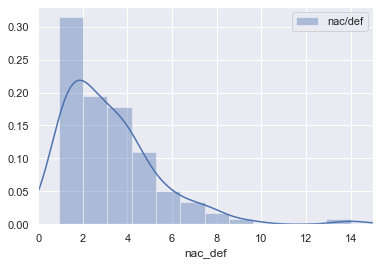

In [56]:
sns.set(style='darkgrid')
sns.distplot(data.nac_def, label = 'nac/def')
plt.xlim((0,15))
plt.legend()

Otra forma de representar la distribución de este ratio sería haciendo uso de un diagrama de caja. Aquí podemos corroborar lo que ya habíamos vislumbrado con el histograma, es decir, que los valores se encuentran bastante concentrados en torno a la mediana. A su vez, se puede comprobar que solo existen dos outliers, que se corresponden con Emiratos Árabes y Kuwait,del cual ya hemos hablado anteriormente. 

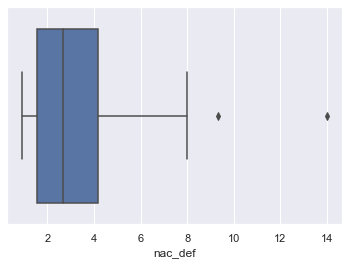

In [58]:
sns.set(style='darkgrid')
sns.boxplot(data.nac_def)


Se ha estudiado también la evolución del ratio nac/def a lo largo de las diferentes regiones:

In [78]:
regi_means = pd.Series(data.groupby('regi_n')['nac_def'].mean(), name = 'nac_def').to_frame()
regi_means['Región'] = regi_means.index
regi_means = regi_means[['Región','nac_def']]
regi_means.reset_index(drop = True, inplace = True)
regi_means

,Región,nac_def
0,1,1.384150
1,2,1.290452
2,3,3.175247
3,4,3.101959
4,5,6.060481
5,6,4.098833


Con los valores de la tabla anterior se podrían agrupar las regiones de la siguiente manera:
* Regiones 1 y 2: Contienen a los países europeos junto a otros con una clara influencia europea (Estados Unidos, Australia...). Se caracterizan por tener tasa de natalidad y mortalidad muy similares entre sí, lo que indica que la población apenas está creciendo.
* Región 3: Correspondientes con los países subdesarrollados de Asia y ciertas excepciones (Japón, Corea del Sur...). En este caso las tasas de natalidad son medias-altas y las tasas de mortalidad son bastante bajas, con la exceptuando algún país en guerra, como es el caso de Afganistán.
* Región 4: Correspondiente con África. Aquí las tasas de natalidad altas son contrarrestadas con tasa de mortalidad también ciertamente altas.
* Regiones 5 y 6: Correspondientes a los países de Oriente Medio y América del Sur/Centroamérica. Las tasas de natalidad son muy altas (aunque algo inferiores a las de África), pero en este caso las tasas de mortalidad son bajas.

Estas agrupaciones se pueden apreciar claramente en el siguiente diagrama de cajas conjunto:

[Text(0, 0.5, 'Nac/Def')]

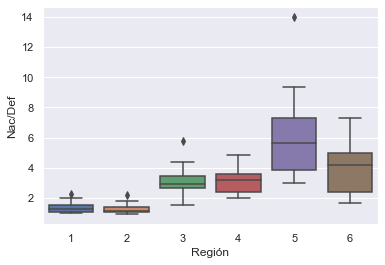

In [37]:
sns.set(style='darkgrid')
ax = sns.boxplot(x="regi_n", y="nac_def", data=data, linewidth=1.5)
ax.set(xlabel = 'Región')
ax.set(ylabel = 'Nac/Def')